In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar,vinterp

from matplotlib.animation import FuncAnimation


## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

## 1. Noah-MP model vertical profile

In [18]:
int_levels=[1000,975,925,850,700,600,500,400,300,200,100]
vert_coord="pressure"

path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
ncfile0 = Dataset(path+'Amazon_NoahMP/3Dfields_d01_2015-11-01_15:00:00')
# Get the Sea Level Pressure
theta0 = getvar(ncfile0, "theta")
p0=getvar(ncfile0, "pressure")

## 1. vertical interpolation using wrf-python
T_vint0 = vinterp(ncfile0,theta0,"pressure",int_levels)

## 2. vertical interpolation using cubic interpolation
xx=300 #lat
yy=300 # lon

import matplotlib.pyplot as plt
from scipy import interpolate
x = p0[:,xx,yy]
y = theta0[:,xx,yy]
f = interpolate.interp1d(x, y,'cubic')

theta_myinterp = f(int_levels[2:]) # have to start from 925hPa as for some grids 1000hPa and 975hPa are under the ground. 

Text(0, 0.5, 'Pressure [hPa]')

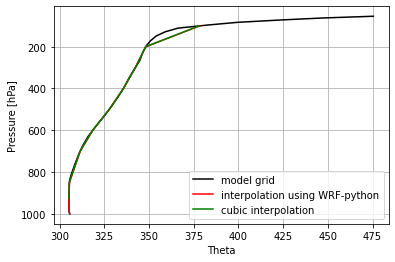

In [19]:
#p_orig=[4,8,12,17,19,21,24,29]

plt.plot(theta0[:,xx,yy],p0[:,xx,yy],color='k',label='model grid')
plt.plot(T_vint0[:11,xx,yy],int_levels[:11],color='red',label='interpolation using WRF-python')
plt.plot(theta_myinterp,int_levels[2:],color='green',label='cubic interpolation')
plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.xlabel('Theta')
plt.ylabel('Pressure [hPa]')
#plt.ylim([1000,600])
#print(p0[:10,xx,yy])

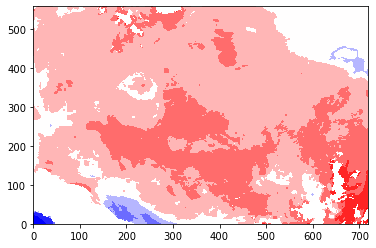

In [40]:
plt.contourf(T_vint0[2,:,:],
                cmap='bwr',extend='both')